In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [10]:
def plot_image(image_1,image_2,title_1="Original",title_2="New Image"):
    plt.figure(figsize=(10,10));
    plt.subplot(1,2,1);
    plt.imshow(image_1,cmap="gray");
    plt.title(title_1);
    plt.figure(figsize=(10,10));
    plt.subplot(1,2,2);
    plt.imshow(image_2,cmap="gray");
    plt.title(title_2);
    plt.show();


Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.

Scaling
We can resize an image using the function resize() from cv2 module for this purpose. You can specify the scaling factor or the size of the image:

Consider the following image with the corresponding intensity values:

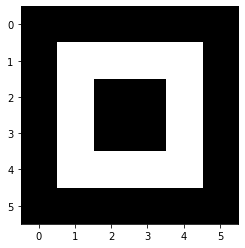

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [11]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

We can rescale along a specific axis:

fx: scale factor along the horizontal axis
fy: scale factor along the vertical axis
The parameter interpolation estimates pixel values based on neighboring pixels. INTER_NEAREST uses the nearest pixel and INTER_CUBIC uses several pixels near the pixel value we would like to estimate.

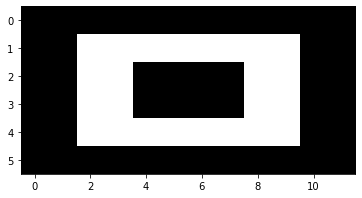

In [12]:
new_toy=cv2.resize(toy_image,None,fx=2,fy=1,interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy,cmap='gray');
plt.show();

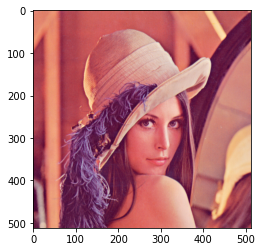

In [14]:
image=cv2.imread('lenna.png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show();

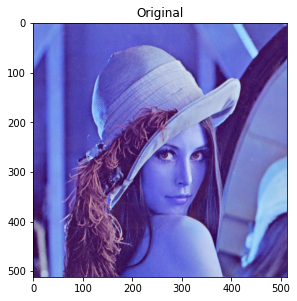

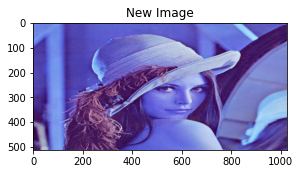

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [16]:
new_image=cv2.resize(image,None,fx=2,fy=1,interpolation=cv2.INTER_CUBIC)
plot_image(image,new_image)
print("old image shape:", image.shape, "new image shape:", new_image.shape)

in the same manner, we can resize the vertical axis by 2

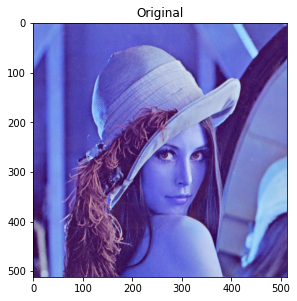

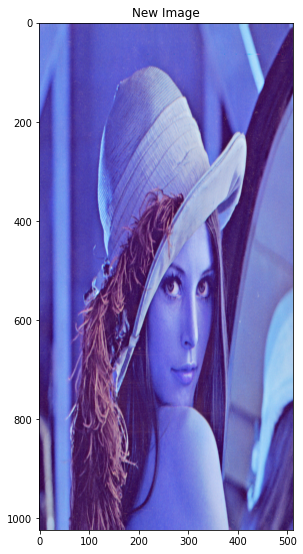

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [18]:
new_image=cv2.resize(image,None,fx=1,fy=2,interpolation=cv2.INTER_CUBIC)
plot_image(image,new_image)
print("old image shape:", image.shape, "new image shape:", new_image.shape)

We can scale the horizontal axis and vertical axis by two.

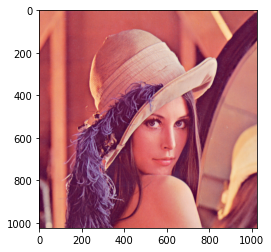

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [19]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

we can also shrink the image

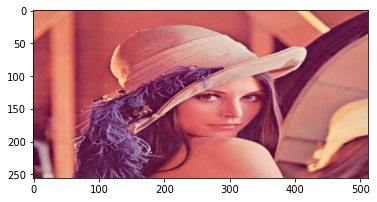

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [20]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

we can also specify the number of rows and columns

In [21]:
rows=100
cols=200

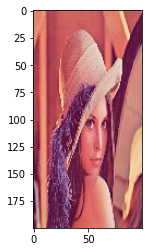

old image shape:  (512, 512, 3)  new image shape:  (200, 100, 3)


In [26]:
new_image=cv2.resize(image,(rows,cols),interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show();
print("old image shape: ",image.shape," new image shape: ",new_image.shape);

Translation¶
Translation is when you shift the location of the image. tx is the number of pixels you shift the location in the horizontal direction and ty is the number of pixels you shift in the vertical direction. You can create the transformation matrix  𝑀  to shift the image.

In this example, we shift the image 100 pixels horizontally:

In [27]:
tx=100
ty=0
m=np.float32([[1,0,tx],[0,1,ty]])
m

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [29]:
rows,cols,_=image.shape

We use the function warpAffine from the cv2 module. The first input parater is an image array, the second input parameter is the transformation matrix M, and the final input paramter is the length and width of the output image  (𝑐𝑜𝑙𝑠,𝑟𝑜𝑤𝑠) :

In [31]:
new_image=cv2.warpAffine(image,m,(rows,cols))

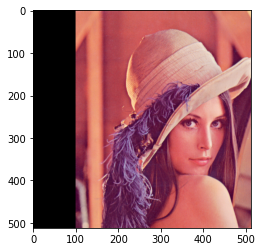

In [32]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show();

We can see some of the original image has been cut off. We can fix this by changing the output image size: (cols + tx,rows + ty):

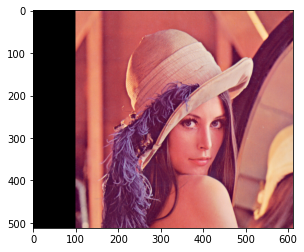

In [33]:
new_image=cv2.warpAffine(image,m,(rows+tx,cols+ty))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show();

Rotation
We can rotate an image by angle θ which is achieved by the Rotation Matrix getRotationMatrix2D.

center: Center of the rotation in the source image. We will only use the center of the image.

angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).

scale: Isotropic scale factor, in this course the value will be one.

We can rotate our toy image by 45 degrees:

In [36]:
theta=45.0
m=cv2.getRotationMatrix2D(center=(3,3),angle=theta,scale=1)
new_toy_image=cv2.warpAffine(toy_image,m,(6,6))

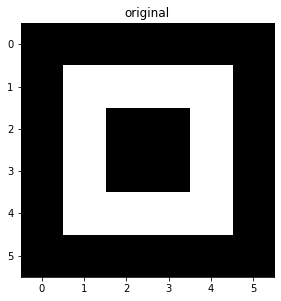

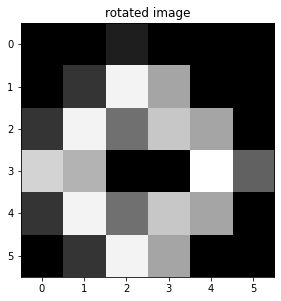

In [37]:
plot_image(toy_image,new_toy_image,title_1="original",title_2="rotated image")

In [38]:
new_toy_image

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

we can also perform such operation on colored images

In [39]:
cols,rows,_=image.shape

In [42]:
m=cv2.getRotationMatrix2D(center=(cols//2-1,rows//2-1),angle=theta,scale=1)
new_image=cv2.warpAffine(image,m,(cols,rows))

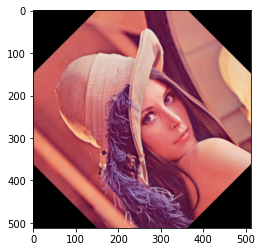

In [43]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

Array Operations¶
We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.

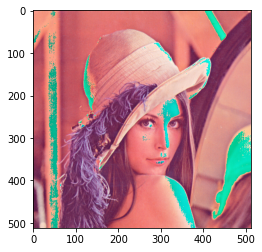

In [46]:
new_image=image+20
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can also multiply every pixel's intensity value by a constant value.

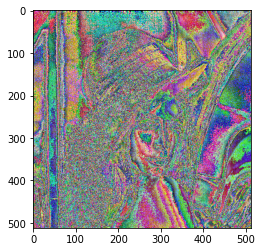

In [47]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.

In [49]:
noise=np.random.normal(0,20,(rows,cols,3)).astype(np.uint8)
noise.shape

(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:

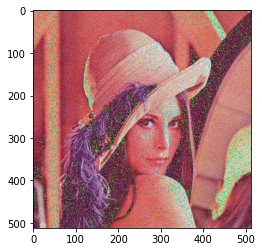

In [50]:
new_image=image+noise
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

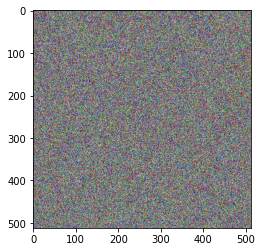

In [51]:
new_image=image*noise
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

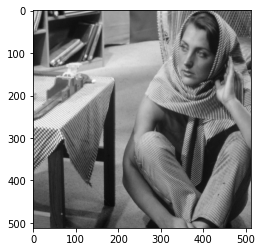

In [52]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

We can apply algorithms designed for matrices. We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.

In [53]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [54]:
s.shape

(512,)

In [55]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)